(<matplotlib.image.AxesImage at 0x8e392476d8>,
 <matplotlib.colorbar.Colorbar at 0x8e3927cda0>)

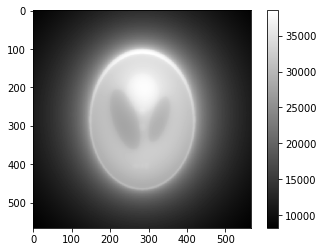

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data
import scipy
from skimage.transform import radon
from numpy import where

#Get example image
input=skimage.io.imread("sinogram.png")

def iradon(input):
    m= input.shape[0]
    n= input.shape[1]
    theta = np.linspace(0, 180, n, endpoint=False)
    th = (np.pi / 180.0) * theta
    output = np.zeros((m, m))

    mid_index = input.shape[0] // 2
    [X, Y] = np.mgrid[0:m, 0:m]
    xpr = X - mid_index
    ypr = Y - mid_index
    x = np.arange(m) - mid_index
    for i in range(len(theta)):
        t = ypr * np.cos(th[i]) - xpr * np.sin(th[i])
        backprojected = np.interp(t, x, input[:, i],left=0, right=0)
        output+=backprojected
    return output
    
output = iradon(input)   
plt.imshow(output,cmap='gray'),plt.colorbar()

(<matplotlib.image.AxesImage at 0x8e38c86240>,
 <matplotlib.colorbar.Colorbar at 0x8e38cbc588>)

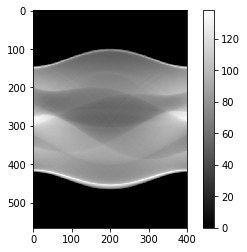

In [4]:
plt.imshow(input,cmap='gray'),plt.colorbar()

In [30]:
def rect(x):
    return where(abs(x)<=0.5, 1, 0)

def filter_ramp(sinogram):
    freqs = sinogram.shape[0]
    freq = np.fft.fftfreq(freqs)
    fsinogram=np.fft.fft(sinogram,axis=0)
    fvalues=fsinogram*np.abs(freq).reshape(-1,1)
    values=np.fft.ifft(fvalues, axis=0)
    values=values.real
    return values

def filter_ramlak(sinogram, omega0):
    freqs = sinogram.shape[0]
    freq = np.fft.fftfreq(freqs)
    fsinogram=np.fft.fft(sinogram, axis=0)
    fvalues=fsinogram*((np.abs(freq)/omega0)*rect(freq/(2*omega0))).reshape(-1,1)
    values=np.fft.ifft(fvalues, axis=0)
    values=values.real
    return values

(<matplotlib.image.AxesImage at 0x8e3b59ee80>,
 <matplotlib.colorbar.Colorbar at 0x8e3b5de208>)

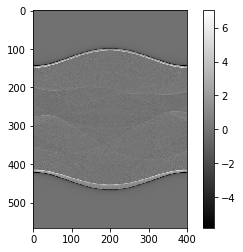

In [37]:
plt.imshow(filter_ramlak(input,1),cmap='gray'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x8e3b63f6d8>,
 <matplotlib.colorbar.Colorbar at 0x8e3b6779b0>)

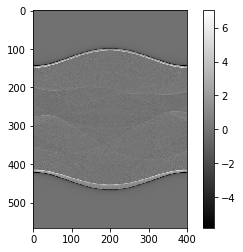

In [38]:
plt.imshow(filter_ramp(input), cmap='gray'),plt.colorbar()

(<matplotlib.image.AxesImage at 0x8e3b6e50f0>,
 <matplotlib.colorbar.Colorbar at 0x8e3b8fc4a8>)

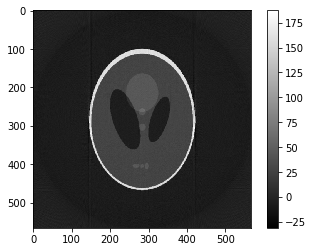

In [39]:
output = iradon(filter_ramlak(input,1))   
plt.imshow(output,cmap='gray'),plt.colorbar()

array([ 0.        ,  0.00179856,  0.00359712,  0.00539568,  0.00719424,
        0.00899281,  0.01079137,  0.01258993,  0.01438849,  0.01618705,
        0.01798561,  0.01978417,  0.02158273,  0.02338129,  0.02517986,
        0.02697842,  0.02877698,  0.03057554,  0.0323741 ,  0.03417266,
        0.03597122,  0.03776978,  0.03956835,  0.04136691,  0.04316547,
        0.04496403,  0.04676259,  0.04856115,  0.05035971,  0.05215827,
        0.05395683,  0.0557554 ,  0.05755396,  0.05935252,  0.06115108,
        0.06294964,  0.0647482 ,  0.06654676,  0.06834532,  0.07014388,
        0.07194245,  0.07374101,  0.07553957,  0.07733813,  0.07913669,
        0.08093525,  0.08273381,  0.08453237,  0.08633094,  0.0881295 ,
        0.08992806,  0.09172662,  0.09352518,  0.09532374,  0.0971223 ,
        0.09892086,  0.10071942,  0.10251799,  0.10431655,  0.10611511,
        0.10791367,  0.10971223,  0.11151079,  0.11330935,  0.11510791,
        0.11690647,  0.11870504,  0.1205036 ,  0.12230216,  0.12